In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import seaborn as sns

In [ ]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
import nltk
import re
from nltk.corpus import stopwords

In [5]:
data=pd.read_csv('/content/drive/My Drive/POSHMARK/ds-take-home-dataset.csv')

In [6]:
df=data.copy()

In [ ]:
#Data Analysis

In [7]:
df.head()

,id,attr1,attr2,attr3,attr4,attr5,attr6,title,sold_price
0,742122,4,27,149.0,3808.0,1.0,99.0,one teaspoon bandit distressed denim shorts (23),65.0
1,652751,4,3,89.0,1996.0,NaN,1500.0,gucci emily mini guccissima mini red leather bag,600.0
2,228229,4,26,301.0,5194.0,NaN,89.0,steve madden polka dot wedges 8.5 - wi06,12.0
3,645810,4,27,NaN,6335.0,NaN,0.0,crown & ivy navy blue floral print shorts,12.0
4,854374,4,22,302.0,3606.0,2.0,45.0,grey wide leg dress pants,22.0


In [8]:
df.shape

(1029850, 9)

In [9]:
df.duplicated().sum()

10203

In [ ]:
#Removing duplicate values

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
#Checking the Nan Values

In [279]:
data.isna().sum()

id                 0
attr1              0
attr2              0
attr3         186770
attr4         165433
attr5         534186
attr6              0
title             89
sold_price         0
dtype: int64

In [19]:
#ATTR1

In [20]:
df['attr1'].value_counts()

4    861881
3    113106
2     35812
1      8848
Name: attr1, dtype: int64

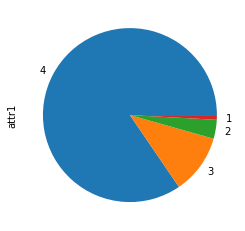

In [22]:
df['attr1'].value_counts().plot(kind='pie')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


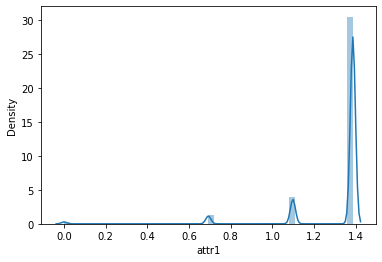

In [23]:
sns.distplot(np.log(df['attr1']))

In [ ]:
#Not going to do anything for the feature ATTR1

In [ ]:
#ATTR2

In [ ]:
checkVal(data['attr2'])

3     219721
26    203988
33     85095
9      74328
2      70963
12     64967
14     60705
22     39328
31     30584
13     30433
20     26573
24     21971
27     18030
11     16379
16     14449
32     13158
28     13157
25      6354
6       4846
17      2077
1       1843
30      1636
19      1325
21      1125
15      1038
5       1008
34       866
10       760
7        677
8        672
35       591
18       576
29       265
4        236
23       126
Name: attr2, dtype: int64


In [ ]:
data['attr2'].nunique()

35

In [ ]:
#Not going to do anything for the feature ATTR2

In [28]:
#ATTR3

In [29]:
df[df['attr3'].isna()]

,id,attr1,attr2,attr3,attr4,attr5,attr6,title,sold_price
3,645810,4,27,NaN,6335.0,NaN,0.0,crown & ivy navy blue floral print shorts,12.00
9,577777,3,12,NaN,NaN,1.0,50.0,linkin park hoodie,22.00
12,217996,4,3,NaN,3075.0,NaN,0.0,malono blahnik bag,10.00
21,217702,4,3,NaN,1228.0,NaN,99.0,coach patchwork bag,50.00
27,92609,4,31,NaN,4356.0,NaN,130.0,cute cashmere ralph lauren sweater,35.00
...,...,...,...,...,...,...,...,...,...
1029824,225007,4,12,NaN,4734.0,NaN,5500.0,biker jacket saint laurent,1000.00
1029829,902048,4,3,NaN,982.0,1.0,0.0,authentic chanel sports black neon orange poch...,250.00
1029843,123071,4,26,NaN,4999.0,2.0,55.0,bobs by skechers,30.00
1029844,865472,4,33,NaN,6049.0,1.0,130.0,"white house black market silk/lace top/shirt, m",14.81


In [ ]:
#filling the remaining null values with the median respective to attr1 and attr2

In [84]:
for i in range(1,36):
  df.loc[(df['attr1']==4) & (df['attr2']==i) &(df['attr3'].isna()),'attr3']=df[(df['attr1']==4) & (df['attr2']==i) &(df['attr3'].notna())]['attr3'].median()

In [85]:
for i in range(1,36):
  df.loc[(df['attr1']==3) & (df['attr2']==i) &(df['attr3'].isna()),'attr3']=df[(df['attr1']==3) & (df['attr2']==i) &(df['attr3'].notna())]['attr3'].median()

In [86]:
for i in range(1,36):
  df.loc[(df['attr1']==2) & (df['attr2']==i) &(df['attr3'].isna()),'attr3']=df[(df['attr1']==2) & (df['attr2']==i) &(df['attr3'].notna())]['attr3'].median()

In [87]:
for i in range(1,36):
  df.loc[(df['attr1']==1) & (df['attr2']==i) &(df['attr3'].isna()),'attr3']=df[(df['attr1']==1) & (df['attr2']==i) &(df['attr3'].notna())]['attr3'].median()

In [102]:
#filling the remaining null values with the median respective to attr1

In [106]:
df.loc[(data['attr1'] == 1 ) & (data['attr3'].isnull()), 'attr3']=df[df['attr1']==1]['attr3'].median()

In [103]:
df.loc[(data['attr1'] == 2 ) & (data['attr3'].isnull()), 'attr3']=df[df['attr1']==2]['attr3'].median()

In [104]:
df.loc[(data['attr1'] == 3 ) & (data['attr3'].isnull()), 'attr3']=df[df['attr1']==3]['attr3'].median()

In [105]:
df.loc[(data['attr1'] == 4 ) & (data['attr3'].isnull()), 'attr3']=df[df['attr1']==4]['attr3'].median()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


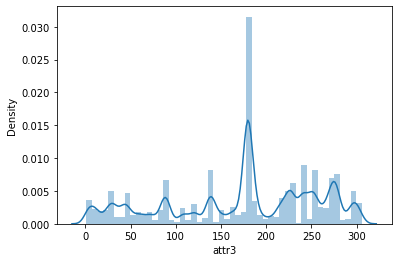

In [107]:
sns.distplot(df['attr3'])

In [110]:
#attr4

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


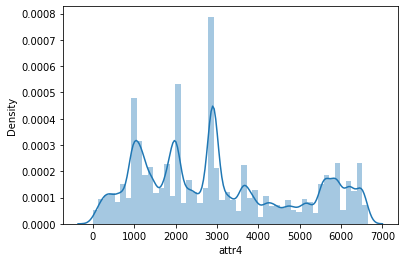

In [111]:
sns.distplot(df['attr4'])

In [113]:
df['attr4'].value_counts()

2896.0    80312
1996.0    43015
982.0     25799
1170.0    20013
3639.0    19139
          ...  
5511.0        1
4756.0        1
427.0         1
3095.0        1
5534.0        1
Name: attr4, Length: 6640, dtype: int64

In [114]:
df['attr4'].isna().sum()

163773

In [125]:
#Filing with 999999999 since attr4 is brand code and if it is null then it seems there is no brand name specified.

In [126]:
df['attr4'].fillna(999999999,inplace=True)

In [128]:
df[df['attr4']==0]

,id,attr1,attr2,attr3,attr4,attr5,attr6,title,sold_price


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


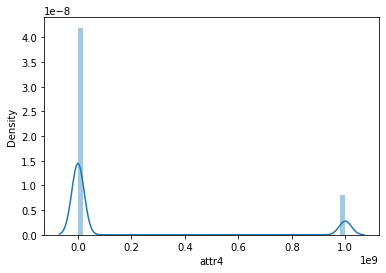

In [127]:
sns.distplot(df['attr4'])

In [130]:
df['attr4'].isna().sum()

0

In [131]:
#attr5

In [132]:
df['attr5'].isna().sum()

528867

In [133]:
df['attr5'].value_counts()

1.0    268780
2.0    221999
3.0         1
Name: attr5, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


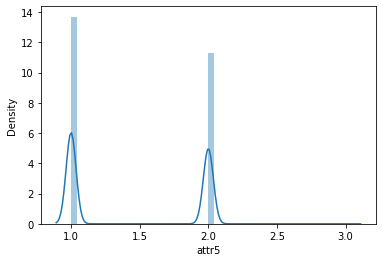

In [134]:
sns.distplot(df['attr5'])

In [136]:
#Since there are nearly 50 % of null in this column. Need to check with the SME about this column.

In [137]:
#attr6

In [138]:
df['attr6'].isna().sum()

0

In [139]:
df['attr6'].value_counts()

0.0       208883
50.0       19033
40.0       16432
30.0       16021
60.0       15196
           ...  
4464.0         1
3987.0         1
4009.0         1
4010.0         1
3016.0         1
Name: attr6, Length: 3671, dtype: int64

In [140]:
#Since there is more than 25% off Zeroes in this column we may need to check with the Business. FFor now we will drop the column.

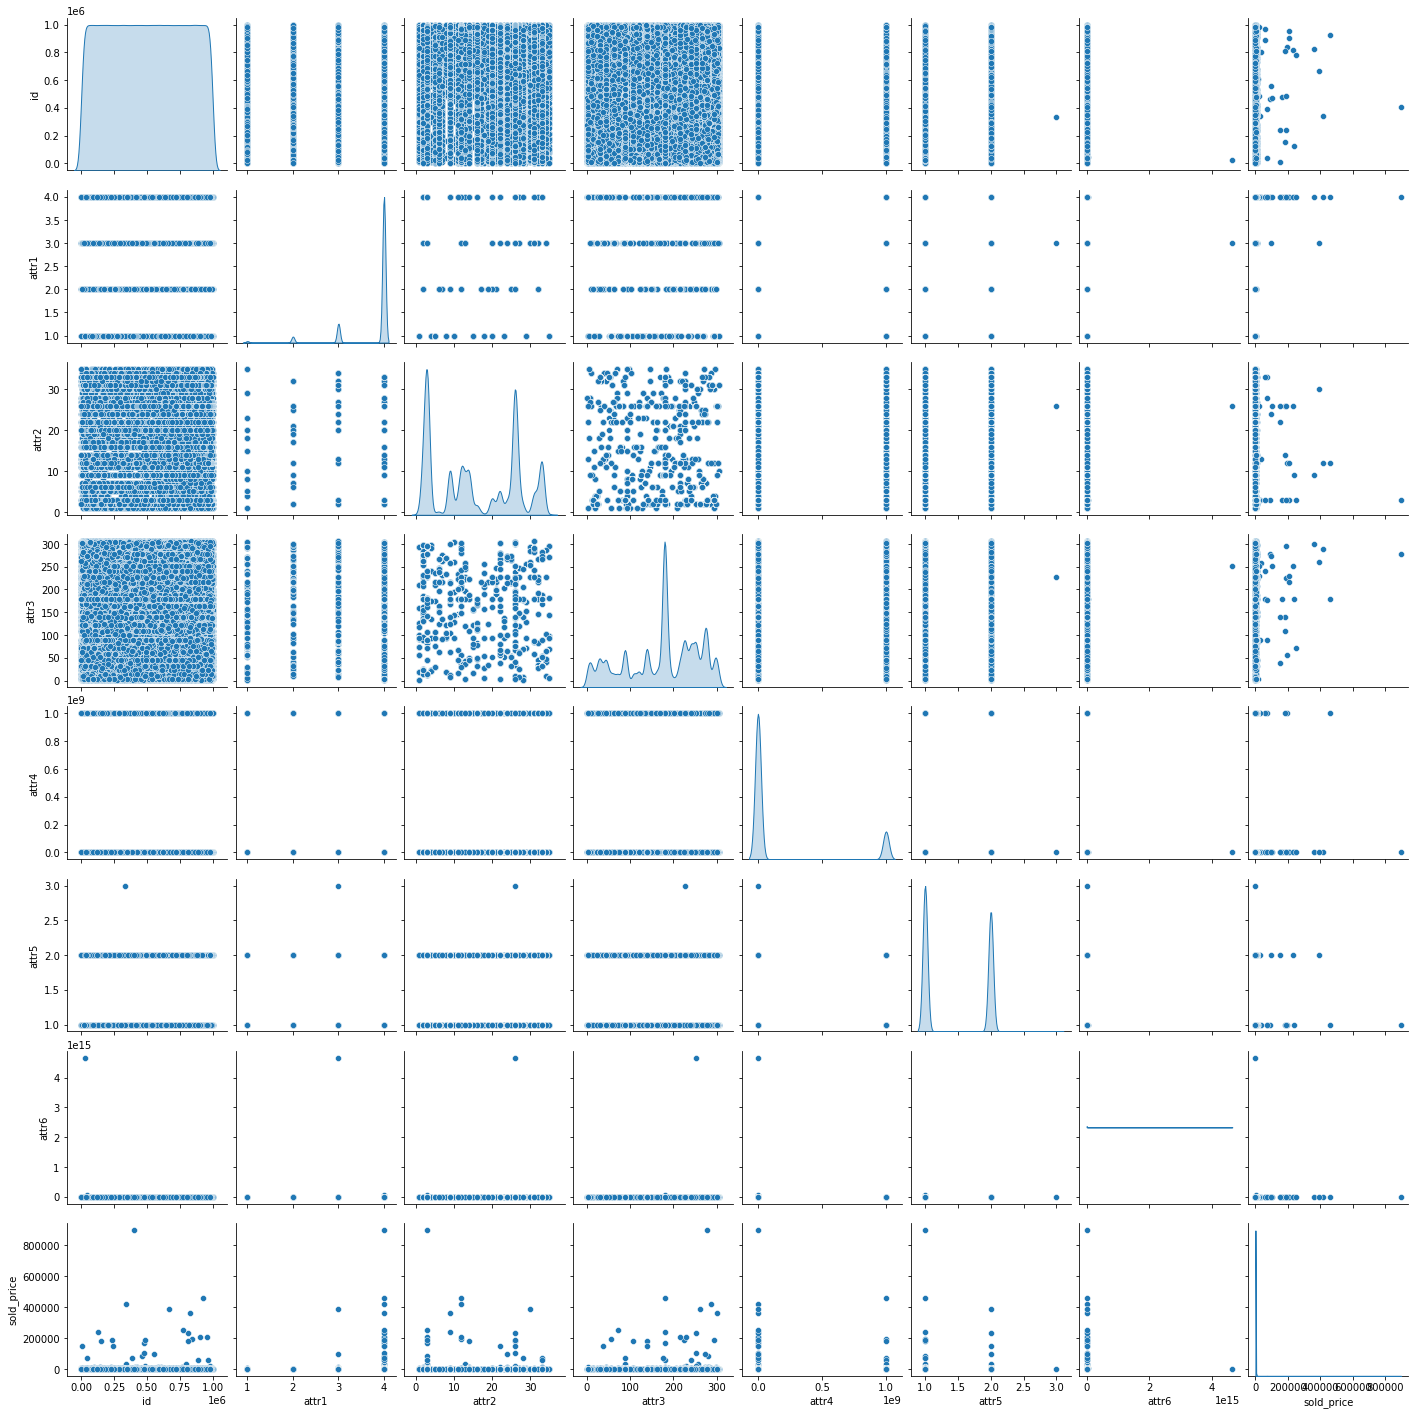

In [141]:
sns.pairplot(df,diag_kind='kde')

In [ ]:
#Correlation

In [143]:
df.corr()

,id,attr1,attr2,attr3,attr4,attr5,attr6,sold_price
id,1.000000,-0.053480,-0.060384,0.003188,0.037947,0.017009,-0.001642,0.016285
attr1,-0.053480,1.000000,-0.052885,-0.038754,-0.115325,-0.031474,-0.001463,0.021839
attr2,-0.060384,-0.052885,1.000000,-0.069128,-0.010236,-0.010390,0.000888,-0.072250
attr3,0.003188,-0.038754,-0.069128,1.000000,-0.012091,-0.010716,0.000933,0.015764
attr4,0.037947,-0.115325,-0.010236,-0.012091,1.000000,0.200850,-0.000437,-0.018982
attr5,0.017009,-0.031474,-0.010390,-0.010716,0.200850,1.000000,-0.001299,-0.005230
attr6,-0.001642,-0.001463,0.000888,0.000933,-0.000437,-0.001299,1.000000,0.000073
sold_price,0.016285,0.021839,-0.072250,0.015764,-0.018982,-0.005230,0.000073,1.000000


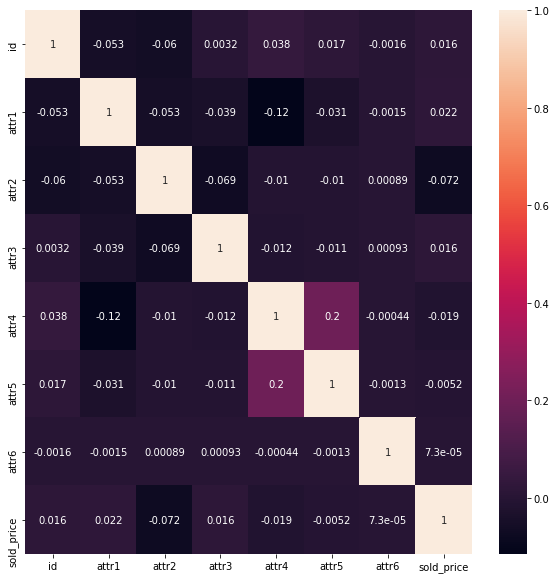

In [144]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

In [ ]:
#From the correlation map we could see that the attr columns does not have good coorelatinship with the sold price. So we are cnsidering the title.

In [145]:
df['title']

0          one teaspoon bandit distressed denim shorts (23)
1          gucci emily mini guccissima mini red leather bag
2                  steve madden polka dot wedges 8.5 - wi06
3                 crown & ivy navy blue floral print shorts
4                                 grey wide leg dress pants
                                 ...                       
1029844     white house black market silk/lace top/shirt, m
1029845        brand  new lucky brand size 10 caisby wedges
1029847         authentic michael kors mindy handbag&wallet
1029848          zion williamson new orlean pelicans jersey
1029849    nwot victorias secret pink extra low rise bikini
Name: title, Length: 1019647, dtype: object

In [146]:
df['title'].isna().sum()

89

In [148]:
df=df[df['title'].notna()]

In [149]:
df['total']=df['title']+' '+df['attr1'].astype('str')+' '+df['attr2'].astype('str')+' '+df['attr3'].astype('str')+' '+df['attr4'].astype('str')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [150]:
df.head()

,id,attr1,attr2,attr3,attr4,attr5,attr6,title,sold_price,total
0,742122,4,27,149.0,3808.0,1.0,99.0,one teaspoon bandit distressed denim shorts (23),65.0,one teaspoon bandit distressed denim shorts (2...
1,652751,4,3,89.0,1996.0,NaN,1500.0,gucci emily mini guccissima mini red leather bag,600.0,gucci emily mini guccissima mini red leather b...
2,228229,4,26,301.0,5194.0,NaN,89.0,steve madden polka dot wedges 8.5 - wi06,12.0,steve madden polka dot wedges 8.5 - wi06 4 26 ...
3,645810,4,27,180.0,6335.0,NaN,0.0,crown & ivy navy blue floral print shorts,12.0,crown & ivy navy blue floral print shorts 4 27...
4,854374,4,22,302.0,3606.0,2.0,45.0,grey wide leg dress pants,22.0,grey wide leg dress pants 4 22 302.0 3606.0


In [ ]:
#Checking how lengthy the entered text is and we could see from below the max length is around 16 words and most of the sentences have 9 to 10 words.

In [151]:
seq_len = [len(i.split()) for i in df['total']]

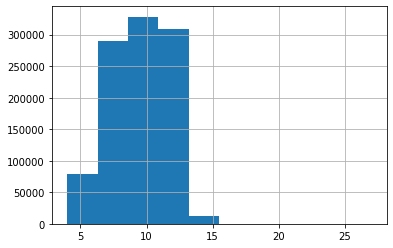

In [152]:
pd.Series(seq_len).hist(bins = 10)

In [ ]:
#Categorizing the sold price into 5 classes as mentioned in the assignment. Could see that it unbalanced.

In [153]:
df['sold_price1']=0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
for i in df.index:
  if df['sold_price'][i] >=1000:
    df['sold_price1'][i]='1000+'
  if df['sold_price'][i]<50:
    df['sold_price1'][i]='0-50'
  if df['sold_price'][i] >=50 and df['sold_price'][i]<100:
    df['sold_price1'][i]='50-100'
  if df['sold_price'][i] >=100 and df['sold_price'][i]<500:
    df['sold_price1'][i]='100-500'
  if df['sold_price'][i] >=500 and df['sold_price'][i]<1000:
    df['sold_price1'][i]='500-1000'
        

In [156]:
df['sold_price1'].value_counts()

0-50        501252
100-500     375872
500-1000     75371
50-100       42693
1000+        24370
Name: sold_price1, dtype: int64

In [ ]:
#Taking the X and y variable for the algorithm.

In [159]:
X=df['total']

In [160]:
y=df['sold_price1']

In [ ]:
#Encoding the y variable

In [239]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y=label_encoder.fit_transform(y)

In [161]:
messages=X.copy()

In [166]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [175]:
messages=df['total'].copy()


In [179]:
messages=messages.reset_index()

In [182]:
messages.drop(columns={'index'},inplace=True)

In [186]:
messages

,total
0,one teaspoon bandit distressed denim shorts (2...
1,gucci emily mini guccissima mini red leather b...
2,steve madden polka dot wedges 8.5 - wi06 4 26 ...
3,crown & ivy navy blue floral print shorts 4 27...
4,grey wide leg dress pants 4 22 302.0 3606.0
...,...
1019553,"white house black market silk/lace top/shirt, ..."
1019554,brand new lucky brand size 10 caisby wedges 4...
1019555,authentic michael kors mindy handbag&wallet 4 ...
1019556,zion williamson new orlean pelicans jersey 3 2...


In [ ]:
### Dataset Preprocessing

In [188]:

from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    # print(i)
    review = re.sub('[^a-zA-Z]', ' ', messages['total'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [189]:
#vocabulary size
voc_size=8000


In [191]:
onehot_repr=[one_hot(words,voc_size)for words in corpus] 
onehot_repr

[[2816, 7641, 4991, 993, 4633, 677],
 [2850, 2201, 1533, 2417, 1533, 3765, 4618, 6619],
 [3908, 2020, 4913, 5001, 6161, 3018],
 [6205, 91, 5754, 1932, 6391, 1465, 677],
 [3319, 7535, 3536, 3405, 4656],
 [6606, 4122, 1683],
 [5897, 4973, 2228],
 [7982, 1154, 7476, 608, 4727, 6272, 2558, 6890],
 [1994, 1782, 6466, 6600, 6161],
 [2425, 7830, 6806],
 [4144, 1969, 3376, 6619],
 [7321, 4916, 6890],
 [903, 7835, 6619],
 [1946, 7670, 7164, 2366, 2179, 5432],
 [5897, 5109, 3061, 6619],
 [3685, 930, 1154, 2978, 6890],
 [7980, 7628, 6591, 1839, 6890, 427, 5820],
 [7759, 427, 427, 6075, 6496, 4771, 6505],
 [2283, 3702, 7408],
 [7980, 2463, 5315, 2530, 562, 7355, 7754],
 [5109, 5719, 5402, 3082, 4955],
 [3702, 6329, 6619],
 [6075, 5489, 4771, 6505, 427],
 [2152, 6975, 4633, 1317],
 [3966, 7361, 7311, 871],
 [1515, 7665, 5812, 427],
 [6397, 4958, 3319, 1841, 6505],
 [4494, 5209, 3198, 1653, 786],
 [54, 1265, 68, 2848],
 [732, 4618, 3061, 6619, 3341, 3259],
 [3605, 5261, 3251, 7980],
 [6397, 4958, 44

In [193]:
##Embedding Representation

In [192]:
sent_length=20
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ...  993 4633  677]
 [   0    0    0 ... 3765 4618 6619]
 [   0    0    0 ... 5001 6161 3018]
 ...
 [   0    0    0 ... 7621 3047  550]
 [   0    0    0 ... 2808 2309  689]
 [   0    0    0 ... 7776 1054 1348]]


In [194]:
embedded_docs[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0, 2816, 7641, 4991,  993, 4633,  677], dtype=int32)

In [252]:
## Creating model
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(LSTM(100))
model.add(Dense(5,activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 20, 40)            320000    
_________________________________________________________________
lstm_6 (LSTM)                (None, 100)               56400     
_________________________________________________________________
dense_6 (Dense)              (None, 5)                 505       
Total params: 376,905
Trainable params: 376,905
Non-trainable params: 0
_________________________________________________________________
None


In [253]:
len(embedded_docs),y.shape

(1019558, (1019558,))

In [254]:
import numpy as np
X_final=np.array(embedded_docs)
y_final=np.array(y)

In [255]:
X_final.shape,y_final.shape


((1019558, 20), (1019558,))

In [256]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.3, random_state=99)

In [257]:
X_train.shape

(713690, 20)

In [258]:
X_test.shape

(305868, 20)

In [259]:
##Model Training

In [262]:
model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test),batch_size=128)

Epoch 1/10
5576/5576 [==============================] - 297s 53ms/step - loss: 0.6282 - accuracy: 0.7715 - val_loss: 0.5845 - val_accuracy: 0.7860
Epoch 2/10
5576/5576 [==============================] - 302s 54ms/step - loss: 0.5632 - accuracy: 0.7948 - val_loss: 0.5606 - val_accuracy: 0.7953
Epoch 3/10
5576/5576 [==============================] - 300s 54ms/step - loss: 0.5371 - accuracy: 0.8043 - val_loss: 0.5510 - val_accuracy: 0.7993
Epoch 4/10
5576/5576 [==============================] - 300s 54ms/step - loss: 0.5192 - accuracy: 0.8107 - val_loss: 0.5495 - val_accuracy: 0.8011
Epoch 5/10
5576/5576 [==============================] - 301s 54ms/step - loss: 0.5044 - accuracy: 0.8156 - val_loss: 0.5491 - val_accuracy: 0.8011
Epoch 6/10
5576/5576 [==============================] - 306s 55ms/step - loss: 0.4911 - accuracy: 0.8207 - val_loss: 0.5458 - val_accuracy: 0.8025
Epoch 7/10
5576/5576 [==============================] - 303s 54ms/step - loss: 0.4785 - accuracy: 0.8249 - val_loss: 0

In [266]:
from sklearn.metrics import confusion_matrix


In [267]:
y_pred=model.predict_classes(X_test)


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [268]:
y_pred

array([4, 2, 2, ..., 4, 2, 4])

In [269]:
confusion_matrix(y_test,y_pred)


array([[12206, 15118, 56002,  9217, 57860],
       [ 8131, 12564, 39961,  7255, 44673],
       [  388,   652,  2419,   428,  3393],
       [ 1054,  1390,  5041,   910,  4307],
       [ 1570,  2044,  7438,  1454, 10393]])

In [270]:
##Adding Dropout

In [271]:
from tensorflow.keras.layers import Dropout

embedding_vector_features=80
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(Dropout(0.3))
model.add(LSTM(200))
model.add(Dropout(0.3))
model.add(Dense(5,activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 20, 80)            640000    
_________________________________________________________________
dropout_4 (Dropout)          (None, 20, 80)            0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 200)               224800    
_________________________________________________________________
dropout_5 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 5)                 1005      
Total params: 865,805
Trainable params: 865,805
Non-trainable params: 0
_________________________________________________________________
None


In [272]:
model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test),batch_size=128)

Epoch 1/10
5576/5576 [==============================] - 780s 140ms/step - loss: 0.6300 - accuracy: 0.7714 - val_loss: 0.5780 - val_accuracy: 0.7885
Epoch 2/10
5576/5576 [==============================] - 801s 144ms/step - loss: 0.5699 - accuracy: 0.7931 - val_loss: 0.5594 - val_accuracy: 0.7957
Epoch 3/10
5576/5576 [==============================] - 801s 144ms/step - loss: 0.5488 - accuracy: 0.8006 - val_loss: 0.5499 - val_accuracy: 0.7993
Epoch 4/10
5576/5576 [==============================] - 813s 146ms/step - loss: 0.5341 - accuracy: 0.8059 - val_loss: 0.5449 - val_accuracy: 0.8015
Epoch 5/10
5576/5576 [==============================] - 804s 144ms/step - loss: 0.5225 - accuracy: 0.8098 - val_loss: 0.5425 - val_accuracy: 0.8031
Epoch 6/10
5576/5576 [==============================] - 799s 143ms/step - loss: 0.5125 - accuracy: 0.8131 - val_loss: 0.5417 - val_accuracy: 0.8036
Epoch 7/10
5576/5576 [==============================] - 801s 144ms/step - loss: 0.5042 - accuracy: 0.8163 - val_

In [304]:
from sklearn.metrics import classification_report,precision_score,plot_confusion_matrix

In [274]:
y_pred=model.predict_classes(X_test)

In [285]:
cf_matrix=confusion_matrix(y_test,y_pred)

In [294]:
print(confusion_matrix(y_test,y_pred,labels=[0,1,2,3,4]))

[[137859  11572    139    529    304]
 [ 10164  97243    800    415   3962]
 [   115   1970   3140      0   2055]
 [  6706   5312      7    670      7]
 [   431  13566   1487      2   7413]]


In [306]:
FP = cf_matrix.sum(axis=0) - np.diag(cf_matrix) 
FN = cf_matrix.sum(axis=1) - np.diag(cf_matrix)
TP = np.diag(cf_matrix)
TN = cf_matrix.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

In [307]:
TNR = TN/(TN+FP) 

In [309]:
print('Specificity for the classes :',TNR)

Specificity for the classes : [0.88797479 0.83226754 0.99185165 0.99677316 0.97763713]


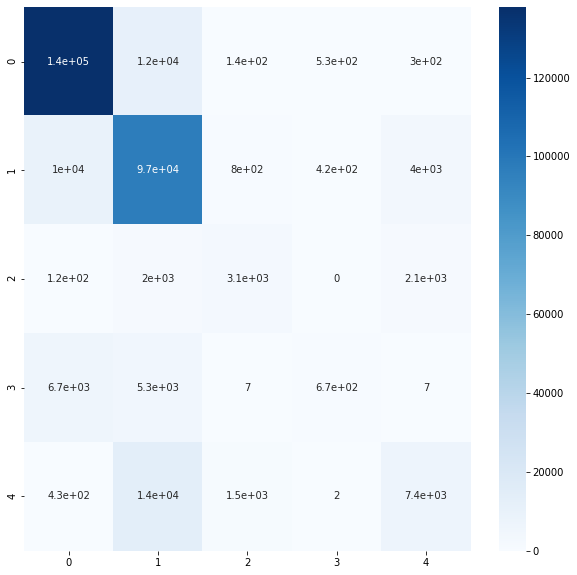

In [298]:
plt.figure(figsize=(10,10))
sns.heatmap(cf_matrix, annot=True,cmap='Blues')

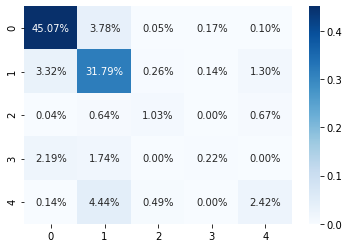

In [288]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

In [300]:
print("Precision Score : ",precision_score(y_test, y_pred, average='micro'))

Precision Score :  0.8053310578419449


In [275]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.92      0.90    150403
           1       0.75      0.86      0.80    112584
           2       0.56      0.43      0.49      7280
           3       0.41      0.05      0.09     12702
           4       0.54      0.32      0.40     22899

    accuracy                           0.81    305868
   macro avg       0.63      0.52      0.54    305868
weighted avg       0.78      0.81      0.78    305868



In [313]:
model.save('ListPriceSuggestion_model.h5')